In [246]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [247]:
#Import the employee dataframe and call it employ
employ = pd.read_csv('./hr_employee_attrition.csv')

In [248]:
#Look to see if there are any null values
employ.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

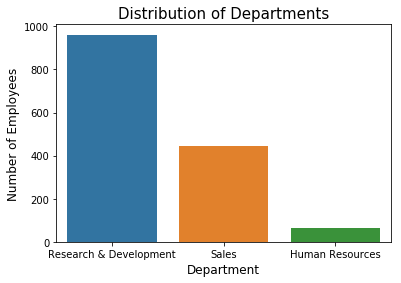

In [249]:
#Create a plot that shows that our balances are not balanced
#We have over 900 observations with R&D and less than 70 observations with HR
dep = employ['Department'].value_counts()
sns.barplot(dep.index, dep.values)
plt.title('Distribution of Departments', fontsize=15)
plt.xlabel('Department', fontsize=12)
plt.ylabel('Number of Employees', fontsize=12);


In [250]:
#make the department into a dummy column
employ = pd.get_dummies(employ, columns=['Department'])

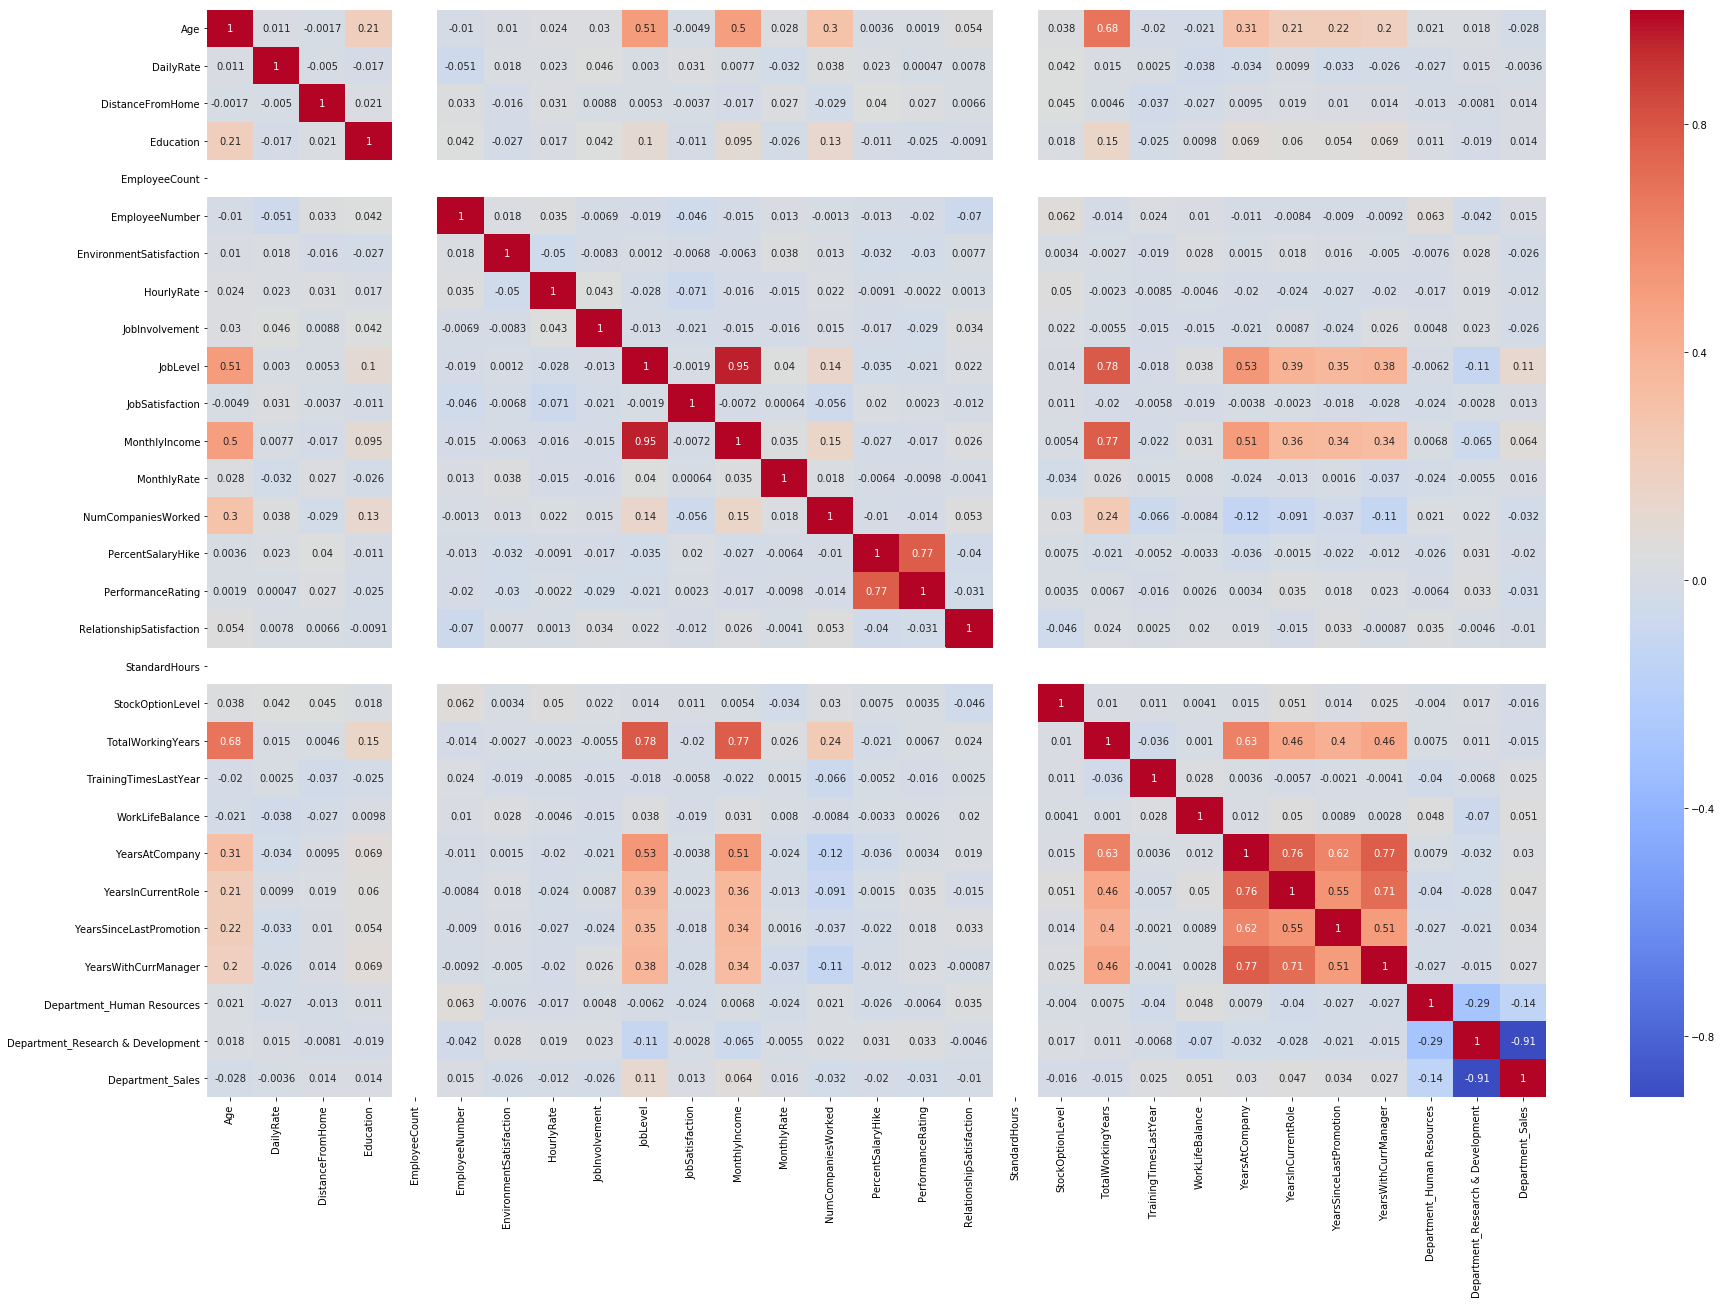

In [251]:
#creating a heatmap to try and see potential correlation.
#This plot does not give me much additional information
plt.figure(figsize=(30, 20))
sns.heatmap(employ.corr(), annot=True, cmap='coolwarm')

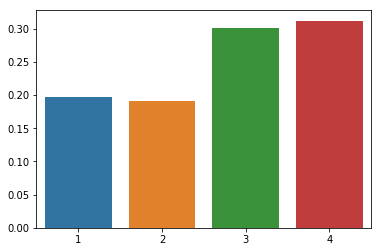

In [252]:
#looking at the distribution of job satisfaction.
#More people have satisfaction levels of 3 and 4 compared to 1 and 2
job_sat_count = employ['JobSatisfaction'].value_counts(normalize=True)
sns.barplot(job_sat_count.index, job_sat_count.values)

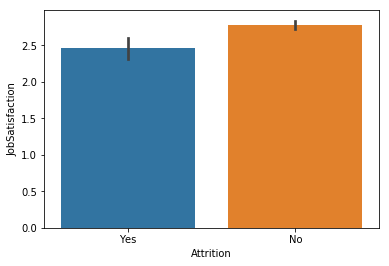

In [253]:
#Job satisfaction does not appear to have a significant impact on attrition.
sns.barplot(employ['Attrition'], employ['JobSatisfaction'])

In [254]:
#Looking at income to see if income is higher if an employee left vs stayed.
#HR employees that left had significantly lower salaries
print(employ[employ['Department_Human Resources'] == 1].groupby('Attrition')['MonthlyIncome'].mean())
print(employ[employ['Department_Human Resources'] == 1]['MonthlyIncome'].mean())

Attrition
No     7345.980392
Yes    3715.750000
Name: MonthlyIncome, dtype: float64
6654.507936507936


In [215]:
#Looking at income to see if income is higher if an employee left vs stayed.
#income decreased for employees that left but not as harshly as HR
print(employ[employ['Department_Research & Development'] == 1].groupby('Attrition')['MonthlyIncome'].mean())
print(employ[employ['Department_Research & Development'] == 1]['MonthlyIncome'].mean())

Attrition
No     6630.326087
Yes    4108.075188
Name: MonthlyIncome, dtype: float64
6281.252861602497


In [255]:
#Looking at income to see if income is higher if an employee left vs stayed.
#Sales had the least income difference for employees that left vs those that stayed.
print(employ[employ['Department_Sales'] == 1].groupby('Attrition')['MonthlyIncome'].mean())
print(employ[employ['Department_Sales'] == 1]['MonthlyIncome'].mean())

Attrition
No     7232.240113
Yes    5908.456522
Name: MonthlyIncome, dtype: float64
6959.17264573991


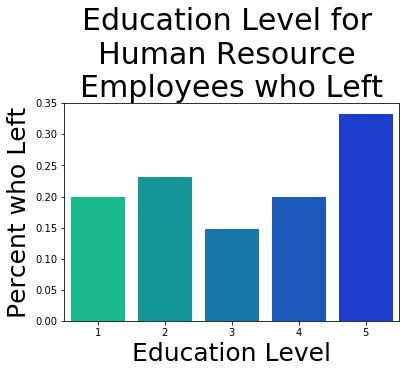

In [224]:
#Making attrition a binary column for the new dataframe
#analyzing to see the education level for employees in HR
hr_edu = employ[employ['Department_Human Resources'] == 1][['Education', 'Attrition']]#.value_counts(normalize=True)
hr_edu = pd.get_dummies(hr_edu, columns=['Attrition'])
hr_edu
sns.barplot(x=hr_edu['Education'], y=hr_edu['Attrition_Yes'], palette='winter_r', ci=None)
plt.title('Education Level for \nHuman Resource \nEmployees who Left', fontsize=30)
plt.xlabel('Education Level', fontsize=25)
plt.ylabel('Percent who Left', fontsize=25); 

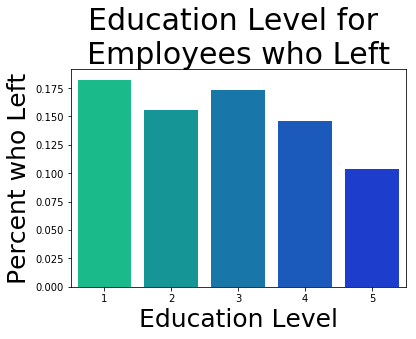

In [226]:
#Making attrition a binary column for the new dataframe
#As you can see there is the opposite relationship of education level on attrition that we see on HR compared to total amount of employees.
edu = employ[['Education', 'Attrition']]
edu = pd.get_dummies(edu, columns=['Attrition'])
sns.barplot(x=edu['Education'], y=edu['Attrition_Yes'], palette= 'winter_r', ci=None)
plt.title('Education Level for \nEmployees who Left', fontsize=30)
plt.xlabel('Education Level', fontsize=25)
plt.ylabel('Percent who Left', fontsize=25); 

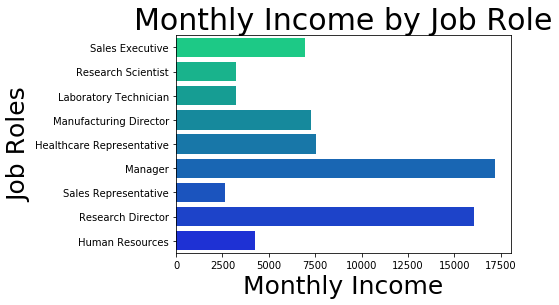

In [256]:
#Looking at the montly income for all the different job roles
sns.barplot(y=employ['JobRole'], x=employ['MonthlyIncome'], palette='winter_r', ci=None)
plt.title('Monthly Income by Job Role', fontsize=30)
plt.xlabel('Monthly Income', fontsize=25)
plt.ylabel('Job Roles', fontsize=25); 

In [257]:
#Make the attrition column a dummy column
employ = pd.get_dummies(employ, columns=['Attrition'])

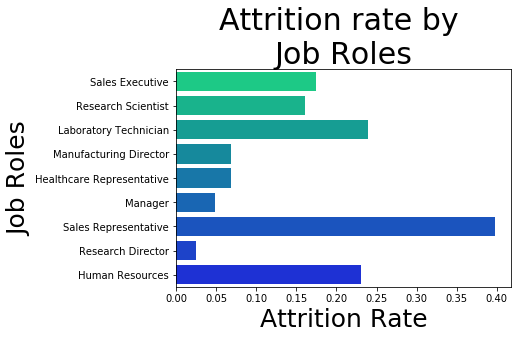

In [258]:
#We can see that sales represatives have the highest attrition rates
sns.barplot(y=employ['JobRole'], x=employ['Attrition_Yes'], palette='winter_r', ci=None)
plt.title('Attrition rate by \nJob Roles', fontsize=30)
plt.xlabel('Attrition Rate', fontsize=25)
plt.ylabel('Job Roles', fontsize=25); 

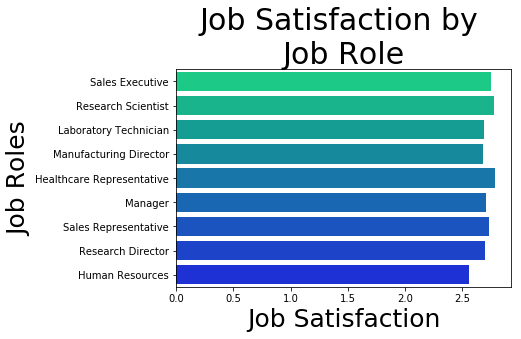

In [259]:
#It is intersting to see sales representatives Job satisfaction
sns.barplot(y=employ['JobRole'], x=employ['JobSatisfaction'], palette='winter_r', ci=None)
plt.title('Job Satisfaction by \nJob Role', fontsize=30)
plt.xlabel('Job Satisfaction', fontsize=25)
plt.ylabel('Job Roles', fontsize=25); 